## Титов Егор, ИУ5-65

### Задача №3, Датасет 2

Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [53]:
data = pd.read_csv('./dc-wikia-data.csv', sep=",")

In [54]:
# размер набора данных
data.shape

(6896, 13)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [56]:
# типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [57]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [58]:
# проверим есть ли пропущенные значения
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [59]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 6896


In [60]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Количество пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Количество пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Количество пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Количество пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Количество пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 69, 1.0%.


In [61]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [62]:
eye_cat_data = data[['EYE']]
eye_cat_data.head()

,EYE
0,Blue Eyes
1,Blue Eyes
2,Brown Eyes
3,Brown Eyes
4,Blue Eyes


In [63]:
eye_cat_data['EYE'].unique()

array(['Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Purple Eyes',
       'Black Eyes', 'White Eyes', 'Red Eyes', 'Photocellular Eyes',
       'Hazel Eyes', 'Amber Eyes', 'Yellow Eyes', nan, 'Grey Eyes',
       'Pink Eyes', 'Violet Eyes', 'Gold Eyes', 'Orange Eyes',
       'Auburn Hair'], dtype=object)

In [64]:
eye_cat_data[eye_cat_data['EYE'].isnull()].shape

(3628, 1)

In [65]:
# Импьютация наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(eye_cat_data)
data_imp

array([['Blue Eyes'],
       ['Blue Eyes'],
       ['Brown Eyes'],
       ...,
       ['Blue Eyes'],
       ['Blue Eyes'],
       ['Blue Eyes']], dtype=object)

In [66]:
# Пустые значения отсутствуют
np.unique(data_imp)

array(['Amber Eyes', 'Auburn Hair', 'Black Eyes', 'Blue Eyes',
       'Brown Eyes', 'Gold Eyes', 'Green Eyes', 'Grey Eyes', 'Hazel Eyes',
       'Orange Eyes', 'Photocellular Eyes', 'Pink Eyes', 'Purple Eyes',
       'Red Eyes', 'Violet Eyes', 'White Eyes', 'Yellow Eyes'],
      dtype=object)

In [67]:
data_imp.shape

(6896, 1)

### Кодирование категорий наборами бинарных значений - one-hot encoding

В этом случае каждое уникальное значение признака становится новым отдельным признаком.Я буду проводить масштабирование при использовании label encoding, но по заданию надо было сделать и one-hot encoding

In [68]:
eye_cat_enc = pd.DataFrame({'EYE':data_imp.T[0]})
eye_cat_enc

,EYE
0,Blue Eyes
1,Blue Eyes
2,Brown Eyes
3,Brown Eyes
4,Blue Eyes
...,...
6891,Blue Eyes
6892,Blue Eyes
6893,Blue Eyes
6894,Blue Eyes


In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
ohe = OneHotEncoder()
eye_cat_enc_ohe = ohe.fit_transform(eye_cat_enc[['EYE']])

In [71]:
eye_cat_enc_ohe.shape

(6896, 17)

In [72]:
eye_cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])

In [73]:
pd.get_dummies(eye_cat_enc).head()

,EYE_Amber Eyes,EYE_Auburn Hair,EYE_Black Eyes,EYE_Blue Eyes,EYE_Brown Eyes,EYE_Gold Eyes,EYE_Green Eyes,EYE_Grey Eyes,EYE_Hazel Eyes,EYE_Orange Eyes,EYE_Photocellular Eyes,EYE_Pink Eyes,EYE_Purple Eyes,EYE_Red Eyes,EYE_Violet Eyes,EYE_White Eyes,EYE_Yellow Eyes
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
pd.get_dummies(eye_cat_data, dummy_na=True).head()

,EYE_Amber Eyes,EYE_Auburn Hair,EYE_Black Eyes,EYE_Blue Eyes,EYE_Brown Eyes,EYE_Gold Eyes,EYE_Green Eyes,EYE_Grey Eyes,EYE_Hazel Eyes,EYE_Orange Eyes,EYE_Photocellular Eyes,EYE_Pink Eyes,EYE_Purple Eyes,EYE_Red Eyes,EYE_Violet Eyes,EYE_White Eyes,EYE_Yellow Eyes,EYE_nan
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Использование LabelEncoder

Был выбран из-за своей ориентации на применение к одному признаку, в нашем случае цвет глаз

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
eye_cat_enc['EYE'].unique()

array(['Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Purple Eyes',
       'Black Eyes', 'White Eyes', 'Red Eyes', 'Photocellular Eyes',
       'Hazel Eyes', 'Amber Eyes', 'Yellow Eyes', 'Grey Eyes',
       'Pink Eyes', 'Violet Eyes', 'Gold Eyes', 'Orange Eyes',
       'Auburn Hair'], dtype=object)

In [77]:
le = LabelEncoder()
eye_cat_enc_le = le.fit_transform(eye_cat_enc['EYE'])

In [78]:
eye_cat_enc_le

array([3, 3, 4, ..., 3, 3, 3])

In [79]:
np.unique(eye_cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [80]:
le.inverse_transform([n for n in range(17)])

array(['Amber Eyes', 'Auburn Hair', 'Black Eyes', 'Blue Eyes',
       'Brown Eyes', 'Gold Eyes', 'Green Eyes', 'Grey Eyes', 'Hazel Eyes',
       'Orange Eyes', 'Photocellular Eyes', 'Pink Eyes', 'Purple Eyes',
       'Red Eyes', 'Violet Eyes', 'White Eyes', 'Yellow Eyes'],
      dtype=object)

In [81]:
data_digit = eye_cat_enc.copy()
data_digit["EYE"] = eye_cat_enc_le

### Масштабирование

In [82]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [83]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_digit[['EYE']])

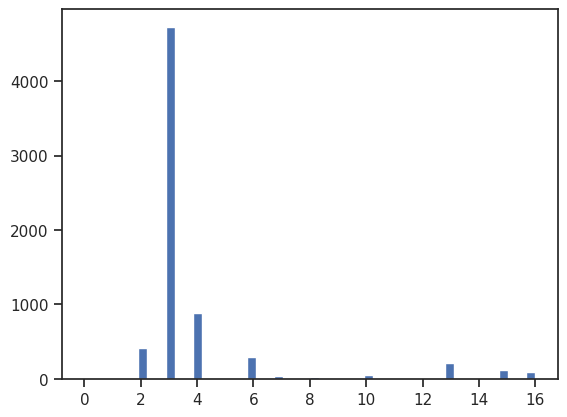

In [84]:
plt.hist(data_digit['EYE'], 50)
plt.show()

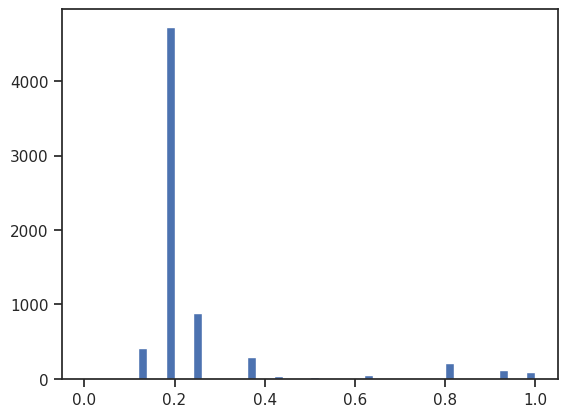

In [85]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [86]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data_digit[['EYE']])

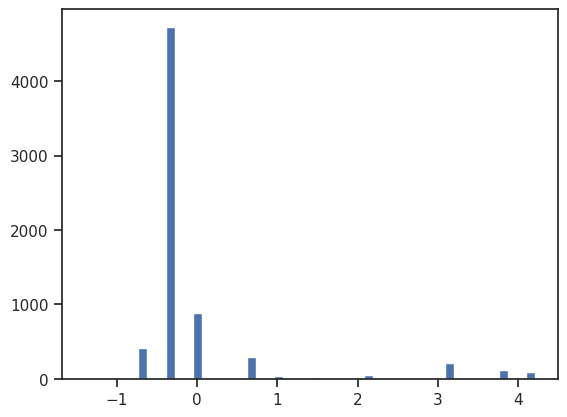

In [87]:
plt.hist(sc2_data, 50)
plt.show()

### Парные диаграммы

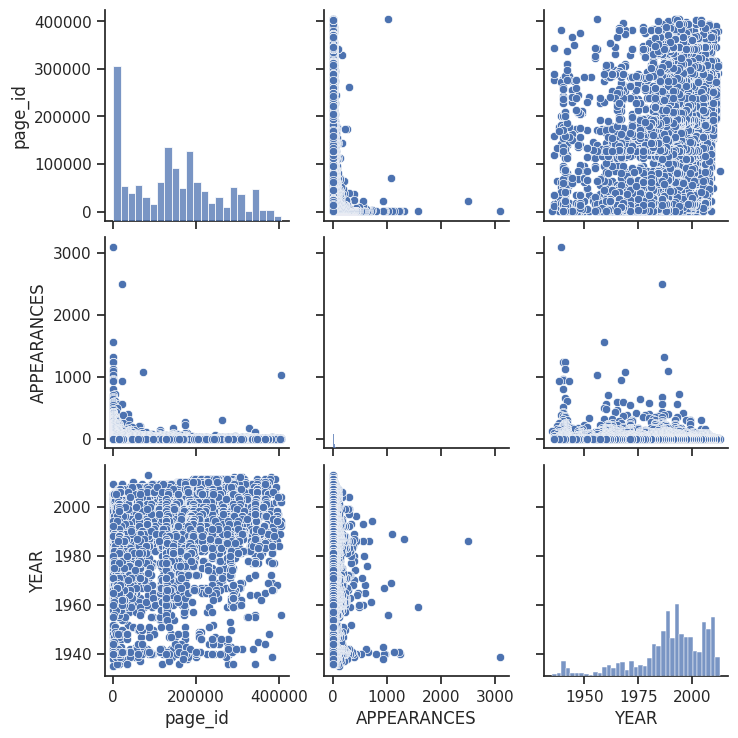

In [88]:
sns.pairplot(data)